### 1)

Shifting an array is like convolving it with a delta function centered such that it picks out the desired value in the array. If we have an array A with N elements and a desired offset b to the left, then the ith element of A is:

$A[i] = \sum_{n=0}^{N-1} A[n]\delta[(n-(i+b))\mod N]$,

where the mod N is to deal with shifting elements out of bounds of the array. 

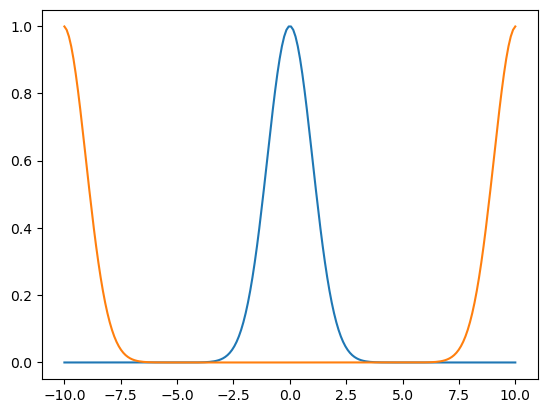

In [24]:
import numpy as np
from matplotlib import pyplot as plt

def delta(x):
    if x==0:
        return 1
    return 0

def shift(a,b):
    N=len(a)
    shifted=np.zeros(N)
    for i in range(N):
        s=0
        for n in range(N):
            s+=a[n]*delta(n-(i+b)%N)
        shifted[i]=s
    return shifted

def gaussian(x,mu,sig):
    return np.exp((-(x-mu)**2)/(2*sig**2))

N=200
x=np.linspace(-10,10,N)
gauss=gaussian(x,0,1)
shift_gauss=shift(gauss,N//2)
plt.plot(x,gauss)
plt.plot(x,shift_gauss)

### 2)

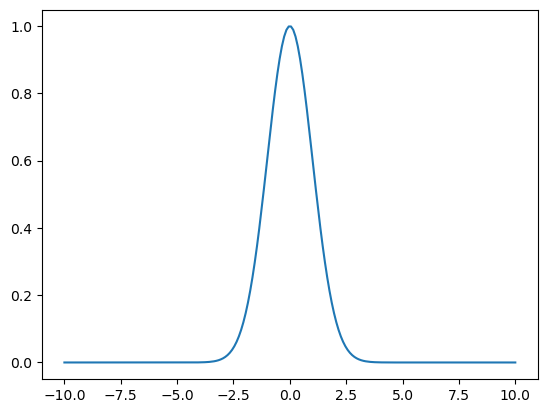

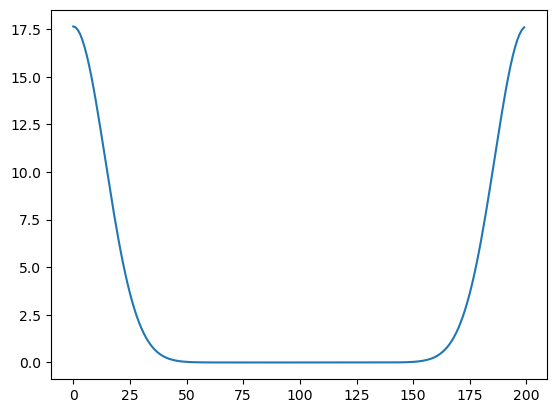

In [40]:
def correlation(f,g):
    return np.fft.irfft(np.fft.rfft(f)*np.conj(np.fft.rfft(g)))

plt.plot(x,gauss)
plt.show()
plt.plot(correlation(gauss,gauss))

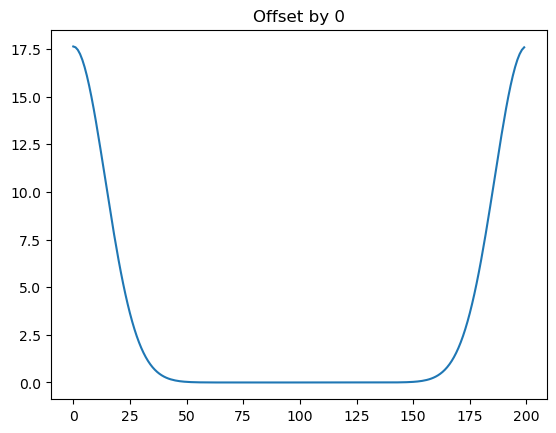

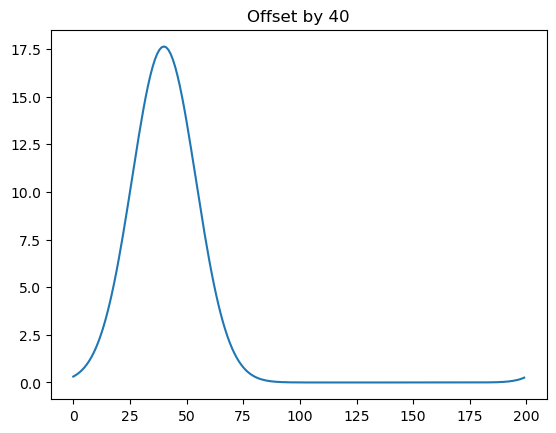

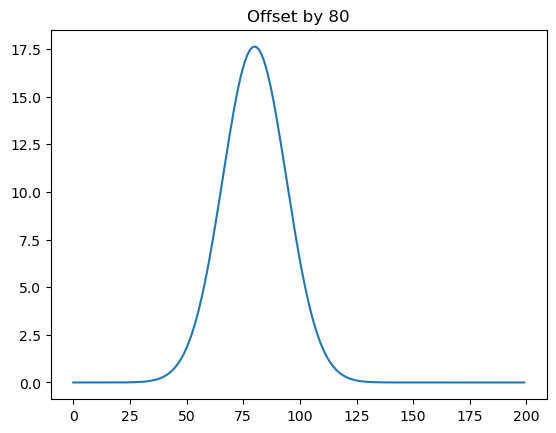

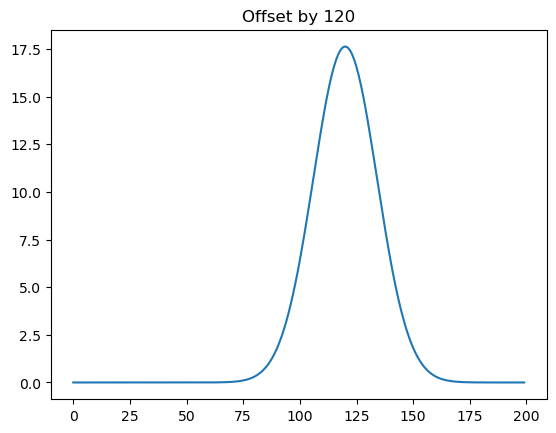

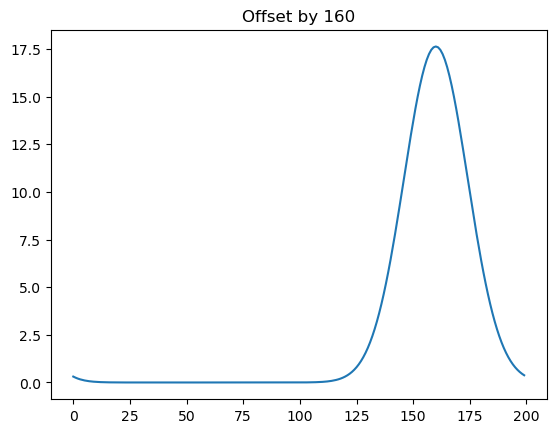

In [38]:
shifts=[i*N//5 for i in range(5)]
for s in shifts:
    plt.plot(correlation(gauss,shift(gauss,s)))
    plt.title('Offset by {}'.format(s))
    plt.show()

Correlation function looks like gaussian centered at offset value. Makes sense as that is where the gaussians would match up exactly and so that is where the peak is. 

### 3)

Convolution just like correlation but no longer take conjugate. Periodic nature of the dft means it will result in circural convolution. To achieve convolution without wrapping around, need to pad end of arrays with zeros to sufficient length since the zeros will not affect when they wrap.

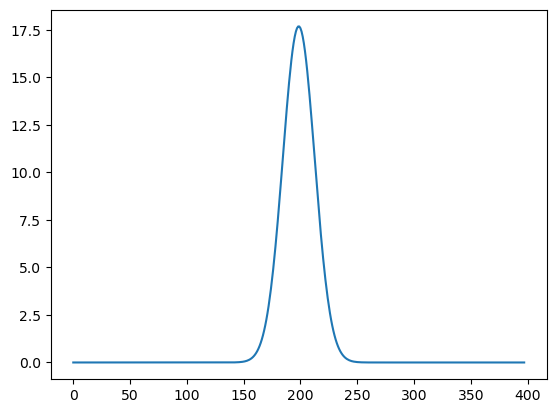

In [66]:
def conv_lin(f,g):
    f_len=len(f)
    g_len=len(g)
    f=np.pad(f,(0,g_len-1))
    g=np.pad(g,(0,f_len-1))
    return np.fft.irfft(np.fft.rfft(f)*np.fft.rfft(g))

conv_gauss=conv_lin(gauss,gauss)

plt.plot(conv_gauss)
plt.show()

### 4)

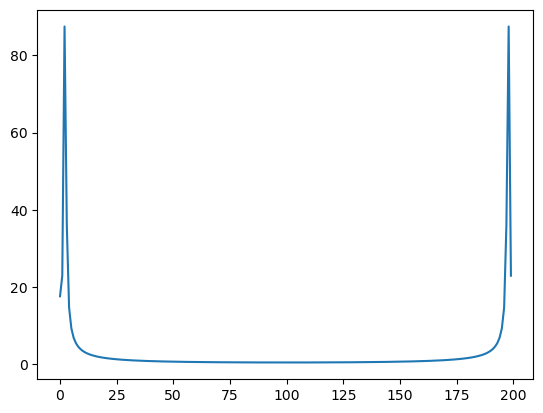

In [126]:
def analytic_dft(a,N):
    x=np.arange(N)
    k=np.expand_dims(np.arange(N),1)
    series=(1/(2j))*(np.exp(-2j*np.pi*(k-a)*x/N)-np.exp(-2j*np.pi*(k+a)*x/N))
    return(np.sum(series,axis=1))

N=200
k=2.3
plt.plot(np.abs(analytic_dft(k,N)))

Roughly appears to be two delta functions, as predicted, with right side one being negative frequency of first. Spectral leakage can be seen as they are not perfect delta peaks, instead some neighbouring k having none 0 amplitude.

In [127]:
# Compare to fft

x=np.arange(N)
f=np.sin(2*np.pi*k*x/N)
dft=np.fft.fft(f)

print("Diff:",np.std(dft-analytic_dft(k,N)))

Diff: 2.6010622579320535e-13


The two methods agree.

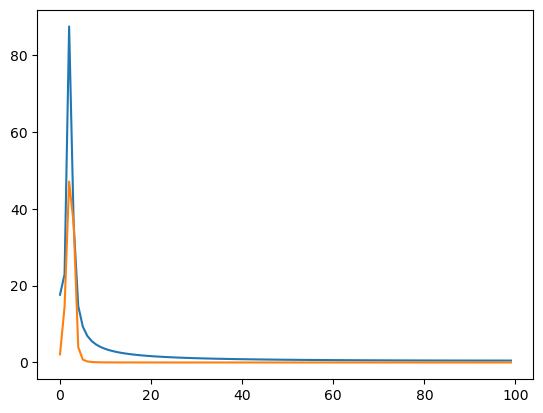

In [128]:
window=0.5-0.5*np.cos(2*np.pi*x/N)
window_f=window*f
window_dft=np.fft.fft(window_f)
plt.plot(np.abs(dft[:N//2]))
plt.plot(np.abs(window_dft[:N//2]))

After multiplying by window, peak seems to be narrower so is closer to the delta function we expect.

In [129]:
N=5
x=np.arange(N)
window=0.5-0.5*np.cos(2*np.pi*x/N)
print(np.real(np.fft.fft(window)))

[ 2.50000000e+00 -1.25000000e+00 -1.11022302e-16 -1.11022302e-16
 -1.25000000e+00]


Diff: 1.0762066761904083e-15


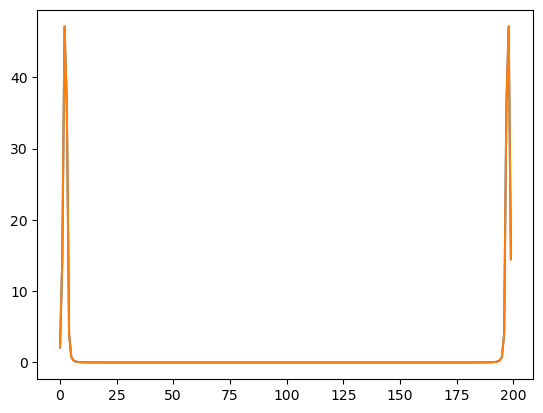

In [156]:
N=200
x=np.arange(N)
f=np.sin(2*np.pi*k*x/N)
dft=np.fft.fft(f)
window=0.5-0.5*np.cos(2*np.pi*x/N)
window_f=window*f
window_dft=np.fft.fft(window_f)

def analytic_window_dft(dft):
    N=len(dft)
    temp=np.zeros(N,dtype='complex')
    for k in range(N):
        temp[k]=1*((1/2)*dft[k%N]-(1/4)*dft[(k-1)%N]-(1/4)*dft[(k+1)%N])
    return temp

plt.plot(np.abs(window_dft))
plt.plot(np.abs(analytic_window_dft(dft)))
print("Diff:",np.std(np.abs(window_dft)-np.abs(analytic_window_dft(dft))))

As expected, was able to recreate windowed fourier transform using the unwindowed fourier transform. Although had to exclude factor of N, some kind of normalization and maybe forgot to divide by N?